In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [161]:
data = pd.read_csv(r'D:\Datasets\haberman.csv')
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [162]:
data.rename({'30':'Age','64':'Year_of_treatment','1':'No_of_pos_ax_nodes','1.1':'survival_status'},axis=1,inplace=True)

In [163]:
data.head()

,Age,Year_of_treatment,No_of_pos_ax_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 305 non-null    int64
 1   Year_of_treatment   305 non-null    int64
 2   No_of_pos_ax_nodes  305 non-null    int64
 3   survival_status     305 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


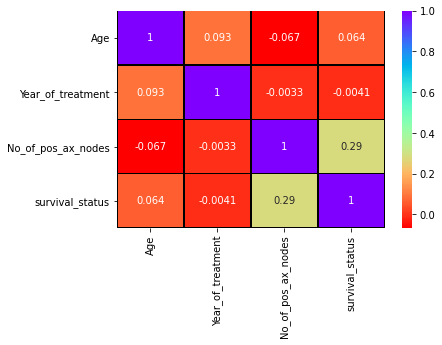

In [165]:
sbn.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='black',cmap = 'rainbow_r')
plt.show()

In [166]:
#No Multi Collinearity

#### AGE

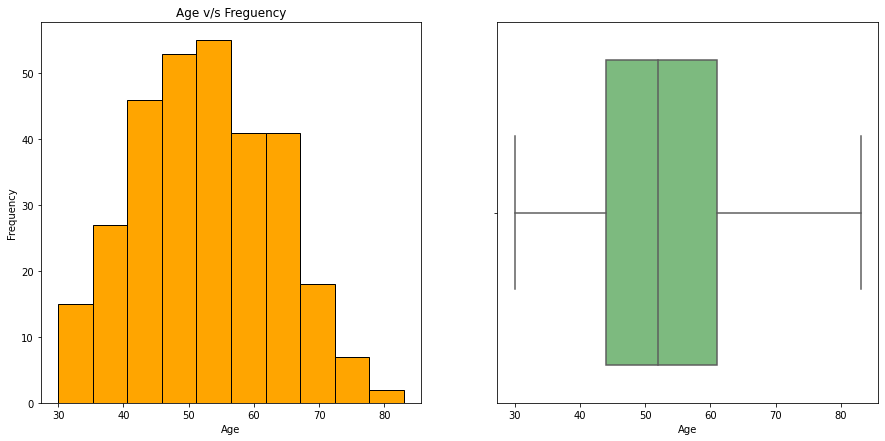

In [167]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
data['Age'].plot.hist(color='orange',edgecolor='black')
plt.xlabel('Age')
plt.title('Age v/s Freguency')
plt.subplot(1,2,2)
sbn.boxplot(x='Age',data=data,palette='Greens')
plt.show()

In [168]:
# No Outliers Present in the Age feature

#### Year Of Treatment

c:\users\legion\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


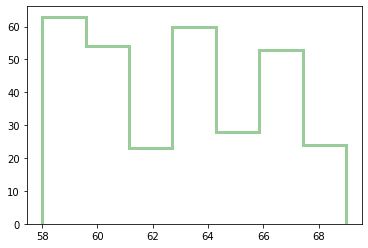

In [169]:
sbn.distplot(x=data['Year_of_treatment'],color='orange',hist_kws={"histtype": "step", "linewidth": 3,
                             "color": "g"},kde=False)
plt.show()

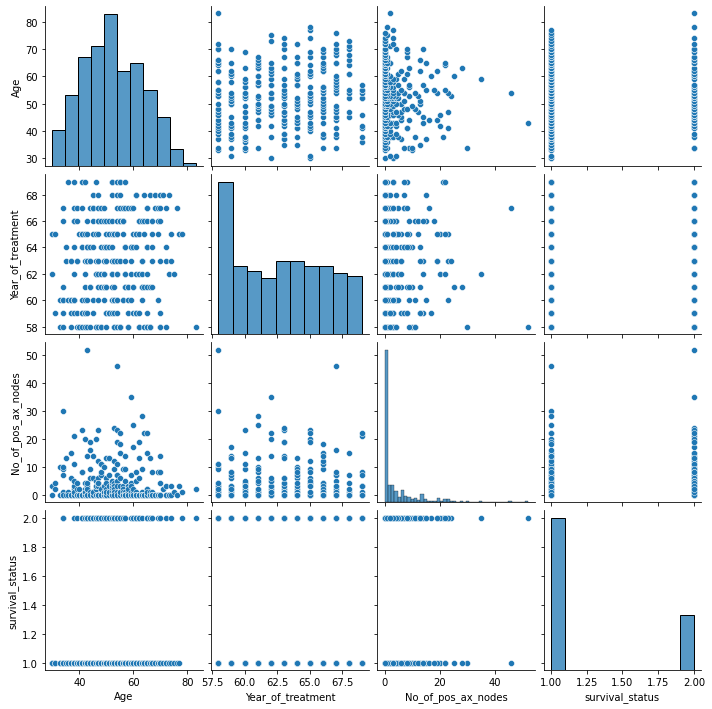

In [170]:
sbn.pairplot(data)

In [171]:
data.head()

,Age,Year_of_treatment,No_of_pos_ax_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [172]:
data['Age'].describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

## FEATURE SCALING

In [173]:
x = data.drop('survival_status',axis=1)
y = data['survival_status']

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)


array([[-2.10053274e+00, -2.61387704e-01, -1.44147084e-01],
       [-2.10053274e+00,  6.62047621e-01, -5.61535003e-01],
       [-2.00730479e+00, -1.18482303e+00, -2.83276391e-01],
       [-2.00730479e+00,  6.62047621e-01, -5.01777826e-03],
       [-1.82084888e+00, -1.49263480e+00,  8.29758059e-01],
       [-1.82084888e+00, -8.77011254e-01, -5.61535003e-01],
       [-1.72762093e+00, -1.18482303e+00, -5.61535003e-01],
       [-1.72762093e+00,  9.69859396e-01,  6.90628753e-01],
       [-1.72762093e+00, -1.49263480e+00,  3.61234418e+00],
       [-1.72762093e+00, -8.77011254e-01, -4.22405697e-01],
       [-1.72762093e+00, -5.69199479e-01,  8.29758059e-01],
       [-1.72762093e+00,  1.27767117e+00,  4.12370140e-01],
       [-1.72762093e+00, -8.77011254e-01, -5.61535003e-01],
       [-1.63439298e+00,  3.54235846e-01,  1.24714598e+00],
       [-1.63439298e+00,  4.64240710e-02, -5.61535003e-01],
       [-1.54116503e+00, -8.77011254e-01, -4.22405697e-01],
       [-1.54116503e+00,  1.89329472e+00

In [175]:
y.shape

(305,)

In [176]:
x.shape

(305, 3)

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=39)

## Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
y_pred = logreg.predict(x_test)

In [180]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[73  2]
 [12  5]]
              precision    recall  f1-score   support

           1       0.86      0.97      0.91        75
           2       0.71      0.29      0.42        17

    accuracy                           0.85        92
   macro avg       0.79      0.63      0.66        92
weighted avg       0.83      0.85      0.82        92

0.8478260869565217


## Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [182]:
y_pre = dtc.predict(x_test)

In [183]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))
print(metrics.accuracy_score(y_test,y_pre))

[[56 19]
 [13  4]]
              precision    recall  f1-score   support

           1       0.81      0.75      0.78        75
           2       0.17      0.24      0.20        17

    accuracy                           0.65        92
   macro avg       0.49      0.49      0.49        92
weighted avg       0.69      0.65      0.67        92

0.6521739130434783


## Random Forest Classifier

In [184]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [185]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
y_predd = rfc.predict(x_test)

In [188]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_predd))
print(metrics.classification_report(y_test,y_predd))
print(metrics.accuracy_score(y_test,y_predd))

[[64 11]
 [11  6]]
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        75
           2       0.35      0.35      0.35        17

    accuracy                           0.76        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.76      0.76      0.76        92

0.7608695652173914


## KNNClassifier

In [189]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [190]:
y_predi = knc.predict(x_test)

In [191]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_predi))
print(metrics.classification_report(y_test,y_predi))
print(metrics.accuracy_score(y_test,y_predi))

[[66  9]
 [ 8  9]]
              precision    recall  f1-score   support

           1       0.89      0.88      0.89        75
           2       0.50      0.53      0.51        17

    accuracy                           0.82        92
   macro avg       0.70      0.70      0.70        92
weighted avg       0.82      0.82      0.82        92

0.8152173913043478


In [192]:
error_rate = []
for i in range (1,200,10):
    knc = KNeighborsClassifier(i)
    knc.fit(x_train,y_train)
    predic_i = knc.predict(x_test)
    error_rate.append(np.mean(predic_i != y_test))

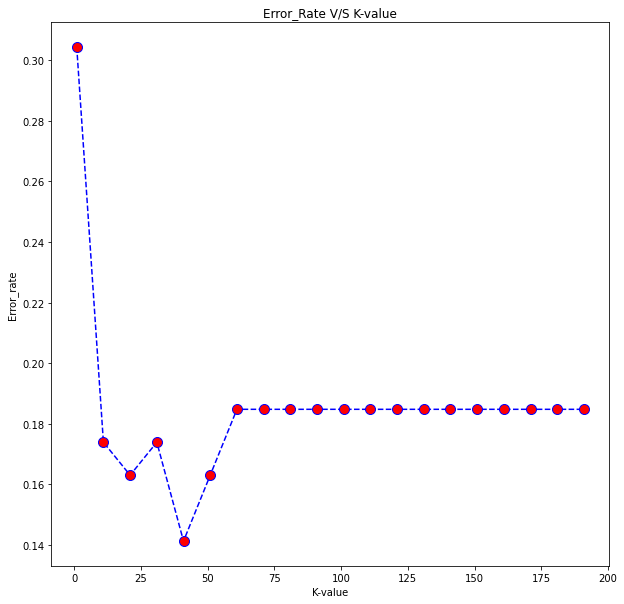

In [194]:
plt.figure(figsize=(10,10))
plt.plot(range(1,200,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error_Rate V/S K-value')
plt.xlabel('K-value')
plt.ylabel('Error_rate')
plt.show()

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 22)
knc.fit(x_train,y_train)
y_predict = knc.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

[[71  4]
 [12  5]]
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        75
           2       0.56      0.29      0.38        17

    accuracy                           0.83        92
   macro avg       0.71      0.62      0.64        92
weighted avg       0.80      0.83      0.80        92

0.8260869565217391


In [197]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 37)
knc.fit(x_train,y_train)
y_predict = knc.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

[[72  3]
 [12  5]]
              precision    recall  f1-score   support

           1       0.86      0.96      0.91        75
           2       0.62      0.29      0.40        17

    accuracy                           0.84        92
   macro avg       0.74      0.63      0.65        92
weighted avg       0.81      0.84      0.81        92

0.8369565217391305


In [198]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 53)
knc.fit(x_train,y_train)
y_predict = knc.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

[[74  1]
 [14  3]]
              precision    recall  f1-score   support

           1       0.84      0.99      0.91        75
           2       0.75      0.18      0.29        17

    accuracy                           0.84        92
   macro avg       0.80      0.58      0.60        92
weighted avg       0.82      0.84      0.79        92

0.8369565217391305
